<a href="https://colab.research.google.com/github/ShamilEmirov/MyNew1/blob/main/Homework_13_7_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
from google.colab import files
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [1]:
# Создаем папку "data" в Google Colab, если её ещё нет
data_folder = '/content/data'
os.makedirs(data_folder, exist_ok=True)

# Загрузка файла с вашего компьютера
uploaded = files.upload()

# Перемещаем файл в папку "data"
for filename in uploaded.keys():
    os.rename(filename, os.path.join(data_folder, filename))

# Печатаем путь к загруженному файлу
print(f"Файл был загружен в: {os.path.join(data_folder, filename)}")


Saving chinook.db to chinook.db
Файл был загружен в: /content/data/chinook.db


In [2]:
# Путь к загруженному файлу базы данных
db_path = '/content/data/chinook.db'

# Подключаемся к базе данных SQLite
conn = sqlite3.connect(db_path)

cursor = conn.cursor()



cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")



Table Name : [('album',), ('artist',), ('customer',), ('employee',), ('genre',), ('invoice',), ('invoice_line',), ('media_type',), ('playlist',), ('playlist_track',), ('track',)]


In [3]:

result = [a for a in cursor.execute("""
    SELECT
        i.invoice_id,
        DATE(i.invoice_date) AS invoice_date,  -- Форматируем дату, чтобы убрать время
        c.customer_id,
        t.track_id,
        CASE
            WHEN g.name IN ('Rock', 'Alternative & Punk', 'Metal', 'Alternative', 'Heavy Metal') THEN 'rock'
            ELSE 'others'
        END AS genre,
        il.unit_price AS track_price
    FROM
        invoice i
    JOIN
        customer c ON c.customer_id = i.customer_id
    JOIN
        invoice_line il ON i.invoice_id = il.invoice_id
    JOIN
        track t ON il.track_id = t.track_id
    JOIN
        genre g ON t.genre_id = g.genre_id
    JOIN
        media_type mt ON t.media_type_id = mt.media_type_id
    WHERE
        mt.name IN ('MPEG audio file', 'Protected AAC audio file', 'Purchased AAC audio file', 'AAC audio file')
        AND strftime('%Y', i.invoice_date) = '2020'
""")]

# Выводим количество строк и сами строки
print(len(result))
print(result[:5])  # Выводим первые 5 строк, чтобы увидеть результат



1150
[(465, '2020-01-12', 21, 149, 'rock', 0.99), (465, '2020-01-12', 21, 150, 'rock', 0.99), (465, '2020-01-12', 21, 151, 'rock', 0.99), (465, '2020-01-12', 21, 152, 'rock', 0.99), (465, '2020-01-12', 21, 153, 'rock', 0.99)]


In [4]:
for row in result:
    print(row)

(465, '2020-01-12', 21, 149, 'rock', 0.99)
(465, '2020-01-12', 21, 150, 'rock', 0.99)
(465, '2020-01-12', 21, 151, 'rock', 0.99)
(465, '2020-01-12', 21, 152, 'rock', 0.99)
(465, '2020-01-12', 21, 153, 'rock', 0.99)
(465, '2020-01-12', 21, 154, 'rock', 0.99)
(465, '2020-01-12', 21, 155, 'rock', 0.99)
(466, '2020-01-19', 30, 428, 'rock', 0.99)
(466, '2020-01-19', 30, 2379, 'rock', 0.99)
(466, '2020-01-19', 30, 73, 'others', 0.99)
(466, '2020-01-19', 30, 2634, 'rock', 0.99)
(467, '2020-01-20', 5, 3424, 'others', 0.99)
(467, '2020-01-20', 5, 1789, 'others', 0.99)
(467, '2020-01-20', 5, 2262, 'rock', 0.99)
(467, '2020-01-20', 5, 1802, 'rock', 0.99)
(467, '2020-01-20', 5, 2012, 'rock', 0.99)
(467, '2020-01-20', 5, 154, 'rock', 0.99)
(467, '2020-01-20', 5, 1956, 'rock', 0.99)
(467, '2020-01-20', 5, 3128, 'others', 0.99)
(467, '2020-01-20', 5, 207, 'others', 0.99)
(467, '2020-01-20', 5, 477, 'rock', 0.99)
(468, '2020-01-22', 25, 2149, 'rock', 0.99)
(468, '2020-01-22', 25, 2150, 'rock', 0.99)
(

In [5]:
df = pd.read_sql_query("""
    SELECT
        i.invoice_id,
        DATE(i.invoice_date) AS invoice_date,  -- Форматируем дату, чтобы убрать время
        c.customer_id,
        t.track_id,
        CASE
            WHEN g.name IN ('Rock', 'Alternative & Punk', 'Metal', 'Alternative', 'Heavy Metal') THEN 'rock'
            ELSE 'others'
        END AS genre,
        il.unit_price AS track_price
    FROM
        invoice i
    JOIN
        customer c ON c.customer_id = i.customer_id
    JOIN
        invoice_line il ON i.invoice_id = il.invoice_id
    JOIN
        track t ON il.track_id = t.track_id
    JOIN
        genre g ON t.genre_id = g.genre_id
    JOIN
        media_type mt ON t.media_type_id = mt.media_type_id
    WHERE
        mt.name IN ('MPEG audio file', 'Protected AAC audio file', 'Purchased AAC audio file', 'AAC audio file')
        AND strftime('%Y', i.invoice_date) = '2020'
""", conn)

print(df.head())  # Печать первых 5 строк для проверки
print(df.shape)

   invoice_id invoice_date  customer_id  track_id genre  track_price
0         465   2020-01-12           21       149  rock         0.99
1         465   2020-01-12           21       150  rock         0.99
2         465   2020-01-12           21       151  rock         0.99
3         465   2020-01-12           21       152  rock         0.99
4         465   2020-01-12           21       153  rock         0.99
(1150, 6)


In [6]:
# Проверка на пропуски
df.isna().sum()

,0
invoice_id,0
invoice_date,0
customer_id,0
track_id,0
genre,0
track_price,0


<Axes: >

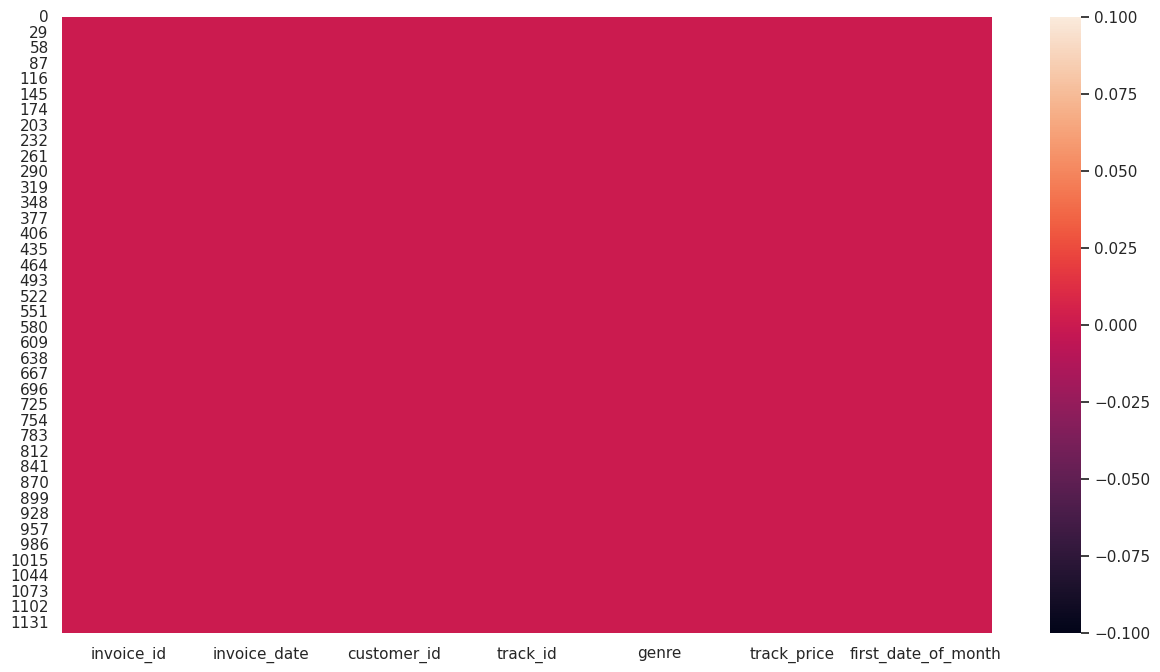

In [33]:
# и по графику видно , что пропусков нету
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull())

In [7]:
# Получаем все строки, которые являются дубликатами
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

     invoice_id invoice_date  customer_id  track_id   genre  track_price
377         517   2020-05-16            3      2573  others         0.99
382         517   2020-05-16            3      2573  others         0.99
989         593   2020-11-23           12      1042  others         0.99
997         593   2020-11-23           12      1042  others         0.99


In [8]:
df.drop_duplicates().shape[0] / df.shape[0]

0.9982608695652174

In [9]:
# Удаляем дубликаты (оставляя только первую строку)
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,invoice_id,invoice_date,customer_id,track_id,genre,track_price
0,465,2020-01-12,21,149,rock,0.99
1,465,2020-01-12,21,150,rock,0.99
2,465,2020-01-12,21,151,rock,0.99
3,465,2020-01-12,21,152,rock,0.99
4,465,2020-01-12,21,153,rock,0.99
...,...,...,...,...,...,...
1145,614,2020-12-30,53,2659,rock,0.99
1146,614,2020-12-30,53,2660,rock,0.99
1147,614,2020-12-30,53,2661,rock,0.99
1148,614,2020-12-30,53,2662,rock,0.99


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_id    1150 non-null   int64  
 1   invoice_date  1150 non-null   object 
 2   customer_id   1150 non-null   int64  
 3   track_id      1150 non-null   int64  
 4   genre         1150 non-null   object 
 5   track_price   1150 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 54.0+ KB


In [19]:
# Преобразуем строку в тип datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [21]:
df['first_date_of_month'] = df['invoice_date'].apply(lambda x: x.replace(day=1))

In [29]:
df.head()

,invoice_id,invoice_date,customer_id,track_id,genre,track_price,first_date_of_month
0,465,2020-01-12,21,149,rock,0.99,2020-01-01
1,465,2020-01-12,21,150,rock,0.99,2020-01-01
2,465,2020-01-12,21,151,rock,0.99,2020-01-01
3,465,2020-01-12,21,152,rock,0.99,2020-01-01
4,465,2020-01-12,21,153,rock,0.99,2020-01-01


In [36]:
# Добавим колонку с месяцем
df['month'] = df['invoice_date'].dt.month

In [39]:
# Группируем данные по месяцам и жанрам
monthly_date = df.groupby(['month', 'genre']).agg(
    total_tracks=('track_id', 'count'), # Общее количество купленных треков
    total_invoices=('invoice_id', 'nunique'), # Число чеков
    total_customers=('customer_id', 'nunique'), # Число покупателей
    total_sales=('track_price', 'sum') # Общая стоимость треков
).reset_index()

monthly_date

,month,genre,total_tracks,total_invoices,total_customers,total_sales
0,1,others,6,3,3,5.94
1,1,rock,38,8,8,37.62
2,2,others,5,4,4,4.95
3,2,rock,93,11,11,92.07
4,3,others,21,6,6,20.79
5,3,rock,58,10,10,57.42
6,4,others,15,8,8,14.85
7,4,rock,106,15,15,104.94
8,5,others,17,8,7,16.83
9,5,rock,66,13,11,65.34


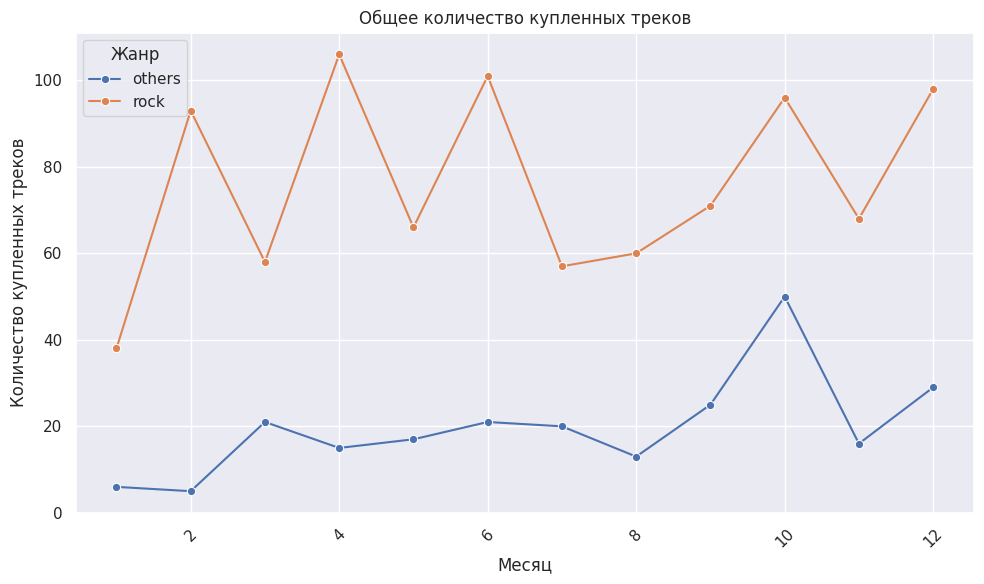

In [44]:
# Общее количество купленных треков по месяцам

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_date, x='month', y='total_tracks', hue='genre', marker='o')
plt.title('Общее количество купленных треков')
plt.xlabel('Месяц')
plt.ylabel('Количество купленных треков')
plt.xticks(rotation=45)
plt.legend(title='Жанр')
plt.tight_layout()
plt.show()

1. Общее количество купленных треков по жанрам:
В жанре rock количество купленных треков значительно выше, чем в категории others на протяжении всего года.
Особенно высокие пики покупок треков жанра rock наблюдаются в 2-ом (93 трека), 4-ом (106 треков), 6-ом (101 трек) и 10-ом (96 треков) месяцах.
В категории others количество треков в месяц варьируется, но значительно ниже, чем в rock. Наибольшие пики зафиксированы в марте (21 трек), июне (21 трек), сентябре (25 треков) и декабре (29 треков).bold text

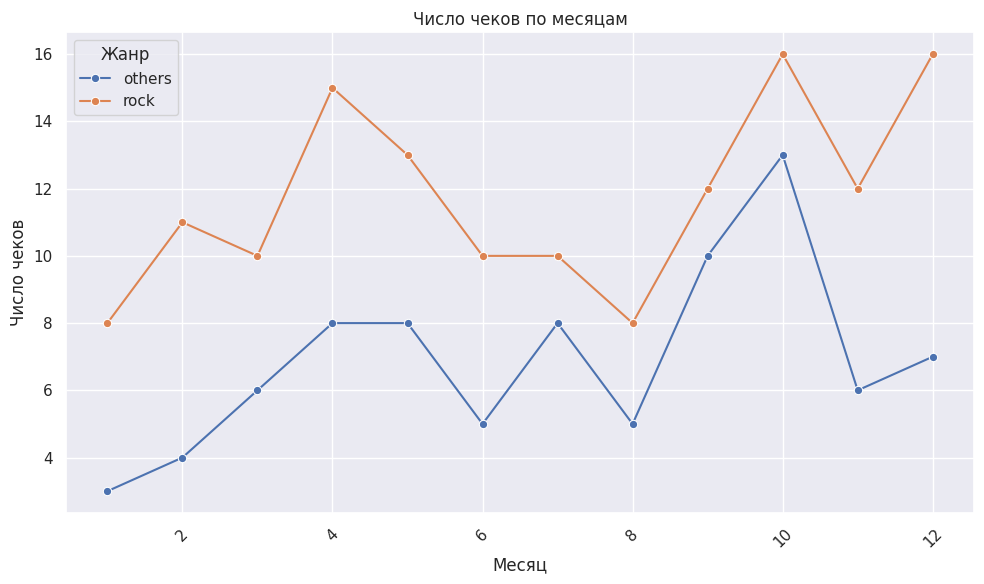

In [48]:
# Число треков по месяцам

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_date, x='month', y='total_invoices', hue='genre', marker='o')
plt.title('Число чеков по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число чеков')
plt.xticks(rotation=45)
plt.legend(title='Жанр')
plt.tight_layout()
plt.show()

2. Число чеков (invoice):
В жанре rock в течение года количество чеков стабильно высокое, что подтверждает, что покупатели чаще всего покупают несколько треков за один чек.
В others численность чеков варьируется, но в целом также стабильна. Например, в апреле (8 чеков) и июле (8 чеков) наблюдаются относительно высокие показатели, но в целом это число ниже, чем у rock.

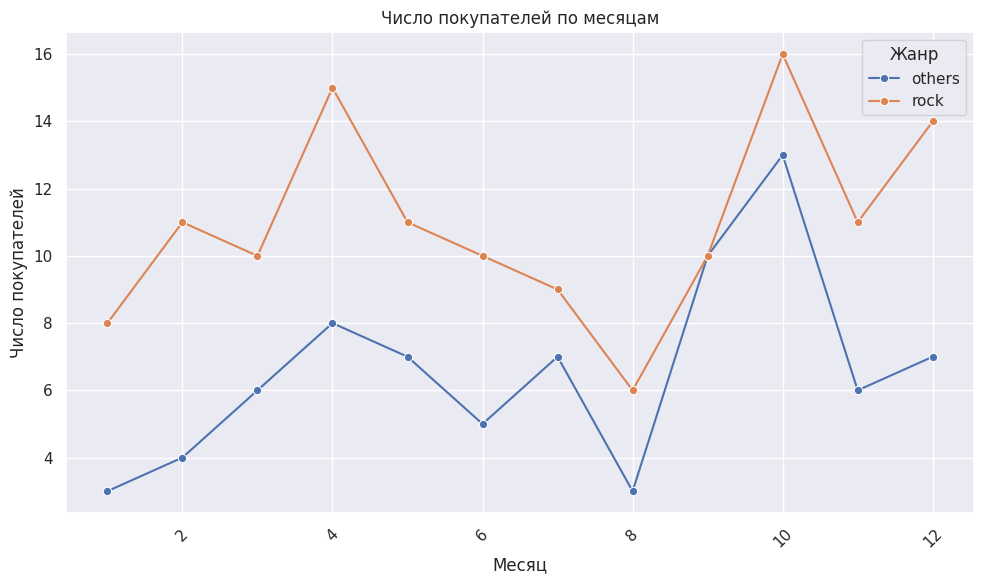

In [49]:
# Число покупателей по месяцам

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_date, x='month', y='total_customers', hue='genre', marker='o')
plt.title('Число покупателей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число покупателей')
plt.xticks(rotation=45)
plt.legend(title='Жанр')
plt.tight_layout()
plt.show()

3. Число покупателей (customers):
В rock за год наблюдается стабильное количество покупателей, которые покупают несколько треков. Это может свидетельствовать о том, что категория жанра rock более популярна среди клиентов.
В others количество покупателей варьируется, но в целом оно меньше, чем в категории rock. Например, в январе (3 покупателя) и апреле (8 покупателей) наблюдаются пики, но в большинстве месяцев число покупателей остаётся ниже, чем у rock.

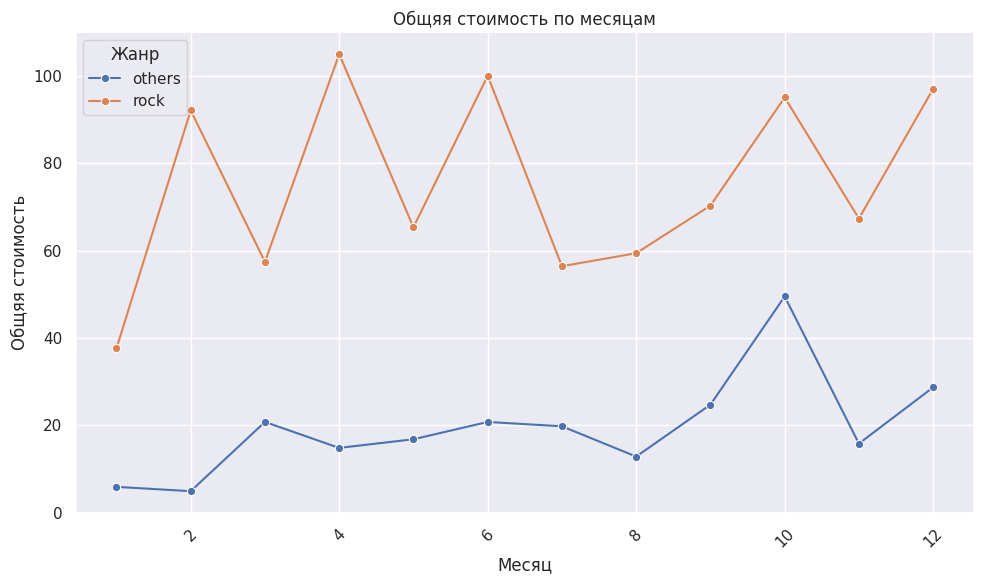

In [50]:
# Число покупателей по месяцам

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_date, x='month', y='total_sales', hue='genre', marker='o')
plt.title('Общяя стоимость по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общяя стоимость')
plt.xticks(rotation=45)
plt.legend(title='Жанр')
plt.tight_layout()
plt.show()

4. Общая стоимость покупок (total sales):
В rock общая стоимость покупок значительно выше, чем в others. Это объясняется тем, что покупатели покупают больше треков, а также стоимость треков в жанре rock в среднем выше.
Особенно высокие показатели общей стоимости продаж жанра rock наблюдаются в 2-ом (92.07), 4-ом (104.94), 6-ом (99.99) и 10-ом (95.04) месяцах.
В others общая стоимость треков значительно ниже, но она всё же имеет некоторые пики. Например, в марте (20.79) и сентябре (24.75) наблюдаются высокие продажи, хотя общая стоимость продаж не может сравниться с rock.


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Сезонность:

Rock показывает явный рост в первые четыре месяца года, что может указывать на сильный интерес к этому жанру в начале года, а затем его постепенное снижение, но всё равно с высоким уровнем покупок в течение всего года.

Others показывает больше вариаций и небольшие пики, с наибольшими значениями в начале года (март, июнь) и в конце (сентябрь, декабрь).


Сравнение по месяцам:

Лучшие месяцы для rock: апрель, июнь, сентябрь, октябрь, где наблюдаются значительные пики и в количестве купленных треков, и в стоимости покупок.
Лучшие месяцы для others: март и сентябрь, где количество треков и общая стоимость покупок были выше среднего уровня для этой категории.


Общий вывод:

Rock жанр явно является более популярным и приносит больший доход, как по количеству покупок, так и по стоимости. Это может свидетельствовать о более широкой аудитории, которая часто покупает несколько треков за один чек.

Others — категория с более переменным спросом, однако её популярность тоже не стоит недооценивать, особенно в определённые месяцы.
Для бизнеса, ориентированного на эти данные, полезно будет сосредоточиться на жанре rock, улучшив маркетинговые стратегии для стимулирования покупок. В то же время, жанр others также имеет потенциал для роста, если сделать акцент на определённые месяцы года, когда его популярность увеличивается.